# Exercise: Cherry Blossoms!

#### Summary

Once upon a time it was サクラ season, which meant the [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! This year they bloomed a little early and they've long sinced faded, so for today we'll stick with data-driven blossoms: http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Data Source(s)

Historical Series of Phenological data for Cherry Tree Flowering at Kyoto City
(and March Mean Temperature Reconstructions), http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Files

- KyotoFullFlower7.xls, "Full-flowering Dates of Prunus jamasakura in Kyoto City"

#### Skills

- Working with Excel files
- Ignoring the first few rows
- Replacing NaN values
- Counting and summarizing columns
- Replacing non-NaN values
- Extracting with strings
- Rolling means

# Read in `KyotoFullFlower7.xls`

Be sure to look at the first five rows.

In [1]:
import pandas as pd
import xlrd
%matplotlib inline


In [2]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df.head()


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


### That... doesn't look right. Why not? 

Examine your column names, and maybe even open up the file in Excel.

### Read in the file correctly, and look at the first five rows

- TIP: The first year should be 801 AD, and it should not have any dates or anything.

### Look at the final five rows of the data

In [3]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## Watching out for NaN values

Take a look at **Reference name**. Is there something you should set to be `NaN`? Use either of the two ways we have covered.

In [4]:
df["Reference Name"].replace("-", "NaN", inplace=True)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(axis=0, how='any')

In [6]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


### Check that you have 827 values for "Full-flowering date (DOY)" and 825 for "Reference Name"

In [7]:
df["Full-flowering date (DOY)"].shape


(825,)

In [8]:
df["Reference Name"].shape


(825,)

# Cleaning up our data

## What sources are the most common as a reference?

In [9]:
df["Reference Name"].value_counts().head()

NEWS-PAPER(ARASHIYAMA)    94
SUGIURAKE-NIKKI           38
MYOHOIN-HINAMIKI          32
OYUDONONO-UENO-NIKKI      26
DAIGOJI-ZATSUYO           21
Name: Reference Name, dtype: int64

## Filter the list to only include rows that have a `Full-flowering date (DOY)`

In [10]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


## Make a histogram of the full-flowering date.

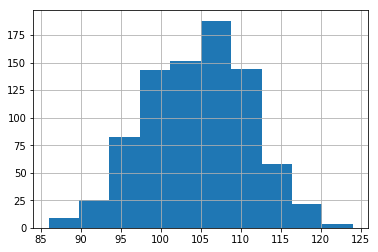

In [11]:
%matplotlib inline
df["Full-flowering date (DOY)"].hist()

## Make another histogram of the full-flowering date, but with 39 bins instead of 10

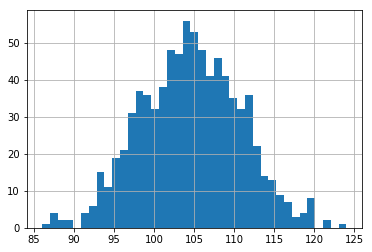

In [12]:
df['Full-flowering date (DOY)'].hist(bins=39)

## What's the average number of days it takes for the flowers to blossom? The max? Min? And how many records do we have?

Answer these with one line of code.

In [13]:
df["Full-flowering date (DOY)"].agg(["mean", "max", "min", "count"])

mean     104.556364
max      124.000000
min       86.000000
count    825.000000
Name: Full-flowering date (DOY), dtype: float64

## What's the average number of days into the year cherry flowers normally blossomed before 1900?

In [14]:
df.head()
df_pre_1900 = df[df["AD"] < 1900]
df_pre_1900["Full-flowering date (DOY)"].mean()

105.22752808988764

## How about after 1900?

In [15]:
df_post_1900 = df[df["AD"] > 1900]
df_post_1900["Full-flowering date (DOY)"].mean()

100.3125

## How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [16]:
df["Data type code"].value_counts()
### 39 are from Japanese poetry

2.0    452
1.0    166
0.0    124
4.0     39
3.0     30
8.0     11
9.0      3
Name: Data type code, dtype: int64

## Actually, that looks terrible. Replace the "Source code" and "data type code" columns with the values they stand for.

In [17]:
df["Data type code"].replace({
    0: "Modern Times", 
    1:"diary description about full-bloom",
    2: "diary description about cherry blossom viewing party",
    3: "cherry twigs from party participants", 
    4: "title in Japanese poety", 
    8: "Aono and Saito", 
    9: "Japanese kerria phenology"}, inplace = True)







In [18]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,diary description about cherry blossom viewing...,NIHON-KOKI
14,815,105.0,415.0,1.0,diary description about cherry blossom viewing...,NIHON-KOKI
30,831,96.0,406.0,1.0,diary description about cherry blossom viewing...,NIHON-KOKI
50,851,108.0,418.0,1.0,diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU


In [19]:
df["Source code"].replace({
    1: "Reported by Taguchi (1939), J. Marine Meteorol. Soc. (Umi to Sora), 19, 217-227", 
    2: "Added by Sekiguchi (1969), Tokyo Geography Papers, 13, 175-190",
    3: "Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272",
    4: "Added by Aono and Kazui (2008), Int. J. Climatol., 28, 905-914 (doi: 10.1002/joc.1594)", 
    5: "Cherry phenological data, Added by Aono and Saito (2010), Int. J. Biometeorol., 54, 211-219", 
    6: "Added by Aono (2011), Time Studies, 4, 17-29. (in Japanese with English abstract)", 
    7: "Added by Aono (2012), Chikyu Kankyo, 17, 21-29. (in Japanese)",
    8: "Found after the last publication of articles"}, inplace = True)


In [20]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU


## Show only the years where our data was from a title in Japanese poetry

In [21]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU


## Graph the full-flowering date (DOY) over time

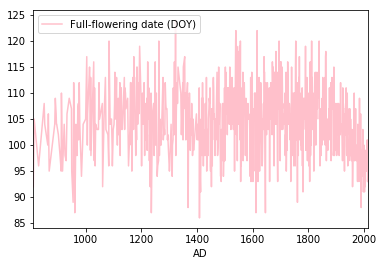

In [25]:
df.plot(x = "AD", y = "Full-flowering date (DOY)", kind = "line", color = "pink")

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [26]:
df.rolling(10, on='AD', min_periods=5).mean().tail()
# If this gives you an error you're using an old pandas version,
# so you can use df.set_index('AD').rolling(10, min_periods=5).mean().reset_index().tail()
# instead

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,95.9,405.7,Found after the last publication of articles,Modern Times,NEWS-PAPER(ARASHIYAMA)
1211,2012,96.9,406.6,Found after the last publication of articles,Modern Times,NEWS-PAPER(ARASHIYAMA)
1212,2013,96.4,406.1,Found after the last publication of articles,Modern Times,NEWS-PAPER(ARASHIYAMA)
1213,2014,96.6,406.4,Found after the last publication of articles,Modern Times,NEWS-PAPER(ARASHIYAMA)
1214,2015,96.0,405.8,Found after the last publication of articles,Modern Times,NEWS-PAPER(ARASHIYAMA)


Adjust the code above to compute **and graph** a 20-year rolling average for the entire dataset.

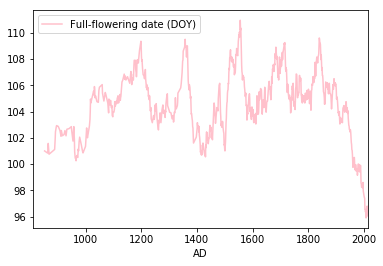

In [27]:
df.rolling(20, on='AD', min_periods=5).mean().plot(x = "AD", y = "Full-flowering date (DOY)", kind = "line", color = "pink")


# Adding a month column

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

### Actually adding our column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

In [62]:
import re

df.loc[df["Full-flowering date"].astype(str).str.contains(r"^[3]"), "Month"] = "March"
df.loc[df["Full-flowering date"].astype(str).str.contains(r"^[4]"), "Month"] = "April"
df.loc[df["Full-flowering date"].astype(str).str.contains(r"^[5]"), "Month"] = "May"


In [66]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,Month
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU,April
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU,April


### Using your new column, how many blossomings happened in each month?

In [67]:
df["Month"].value_counts()

April    813
March      9
May        3
Name: Month, dtype: int64

### Graph how many blossomings happened in each month.

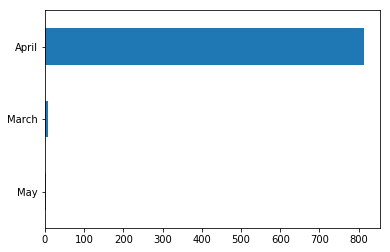

In [69]:
df["Month"].value_counts().plot(kind="barh").invert_yaxis()

## 19. Adding a day-of-month column

Now we're going to add a new column called **day-of-month** based on the full-flowering date.

- 402 means "April 2"
- 312 means "March 12"
- 511 means "May 11"

**We're only interested in the second part**. Previously I've had students convert them to integers to do this, but you know regular expressions!

- Tip: You won't be able to extract anything from a float, you'll need it to be a string
- Tip: There are two things that mean "talk about this column as a string," maybe you want me to talk about them?

In [71]:
df["days-of-month"] = df["Full-flowering date"].astype(str).str.extract(r"\d(\d\d)")


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [72]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,Month,days-of-month
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April,01
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April,15
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April,06
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU,April,18
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU,April,14


Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`. If should look like "April 09".

In [75]:
df["date"] = df["Month"] + " " + df["days-of-month"]

In [76]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,Month,days-of-month,date
11,812,92.0,401.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April,01,April 01
14,815,105.0,415.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April,15,April 15
30,831,96.0,406.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,NIHON-KOKI,April,06,April 06
50,851,108.0,418.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU,April,18,April 18
52,853,104.0,414.0,"Reported by Taguchi (1939), J. Marine Meteorol...",diary description about cherry blossom viewing...,MONTOKUTENNO-JITSUROKU,April,14,April 14
